#classify the radio signals from outer space into one of four classes.

##Retrieve the signals data

###SETI Data Set
Training Data:
  - train_images: Normalized values of Pixels
  - train_labels: Stored as One-Hot Encoded data

Validation Data:
  - val_images: Normalized values of Pixels
  - val_labels: Stored as One-Hot Encoded data

Classes: 0=“squiggle”, 1=“narrowband”, 2=“narrowbanddrd”, and 3=“noise”

In [1]:
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0 -O dataset.zip

--2023-09-30 16:44:16--  https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma [following]
--2023-09-30 16:44:16--  https://www.dropbox.com/sh/raw/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc873296eae1bc641a948e2de06c.dl.dropboxusercontent.com/zip_download_get/BoHqLmbJE2sKjWSyuDIU4q0wZo7uC2bYjrUVJW9FyROCdVtCOUDZi8vdpfbERpZRgWK5-FtkPke1FLToKa-V7S-s4W7LkGjQoycX0LtCyI3UYA# [following]
--2023-09-30 16:44:17--  https://uc873296eae1bc641a948e2de06c.dl.dropboxusercontent.com/zip_download_get/BoHqLmbJE2sKjWSyuDIU4q0wZo7uC2bYjrUVJW9FyROCdVtCOUDZi8vdpfbERpZRgWK5-FtkPke1FLToKa-V7S-s4W7L

In [2]:
!unzip dataset.zip
! mv /content/valid/images\ \(1\).csv /content/valid/images.csv
! mv /content/valid/labels\ \(1\).csv /content/valid/labels.csv
!rm dataset.zip

Archive:  dataset.zip
mapname:  conversion of  failed
   creating: valid/
   creating: train/
 extracting: train/images.csv        
 extracting: train/labels.csv        
 extracting: valid/labels (1).csv    
 extracting: valid/images (1).csv    


##Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print ("tensorflow version: ", tf.__version__)


tensorflow version:  2.13.0


##Read data & visualize

In [4]:
train_df = pd.read_csv('train/images.csv',header=None)
train_labels_df=pd.read_csv('train/labels.csv',header=None)
validate_df=pd.read_csv('valid/images.csv', header=None)
validate_labels_df=pd.read_csv('valid/labels.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [5]:
train_labels_df.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [6]:
print("training data shape:",train_df.shape)
print("validation data shape:",validate_df.shape)
print("training labels shape:", train_labels_df.shape)
print("validation labels shape:", validate_labels_df.shape)


training data shape: (3200, 8192)
validation data shape: (800, 8192)
training labels shape: (3200, 4)
validation labels shape: (800, 4)


Reshape the training data as the neural network can’t take in a Data Frame format. 8192 is 64*128 image

In [7]:
x_train=train_df.values.reshape(3200,64,128,1)
x_valid=validate_df.values.reshape(800,64,128,1)

y_train=train_labels_df.values
y_valid=validate_labels_df.values



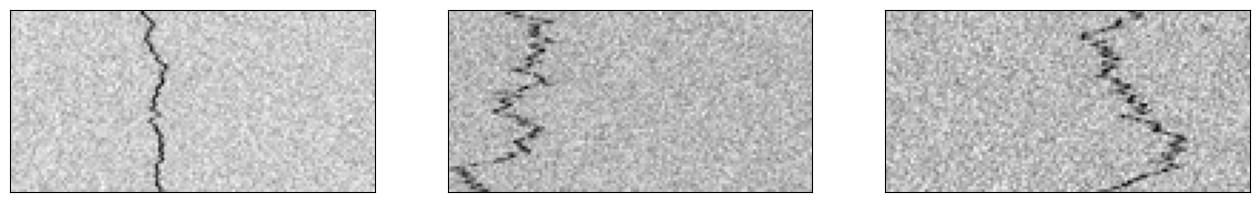

In [8]:
plt.figure(0,figsize=(16,16))
for i in range(1,4):
  plt.subplot(1,3,i)
  plt.xticks([])
  plt.yticks([])
  img=x_train[np.random.randint(0,x_train.shape[1])]
  plt.imshow(img, cmap='gray')


##Using Image Generator to transform some of the images randomly during training process with a horizontal flip

In [9]:
datagen_train=ImageDataGenerator (horizontal_flip=True)
datagen_valid=ImageDataGenerator(horizontal_flip=True)
datagen_valid.fit(x_valid)

##CNN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


In [13]:
model=Sequential()
#1st Convolution
model.add(Conv2D(32, (5,5), input_shape=(64,128,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

#2nd convolution
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#Output
model.add(Dense(4,activation='softmax'))

initial_learning_rate=0.005
lr_schedule= tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_learning_rate,decay_steps=5,
                                                            decay_rate=0.96,staircase=True)
optimizer=Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 124, 32)       832       
                                                                 
 batch_normalization_3 (Bat  (None, 60, 124, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 30, 62, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 58, 64)        51264     
                                                                 
 batch_normalization_4 (Bat  (None, 26, 58, 64)       

###Callbacks and training the model

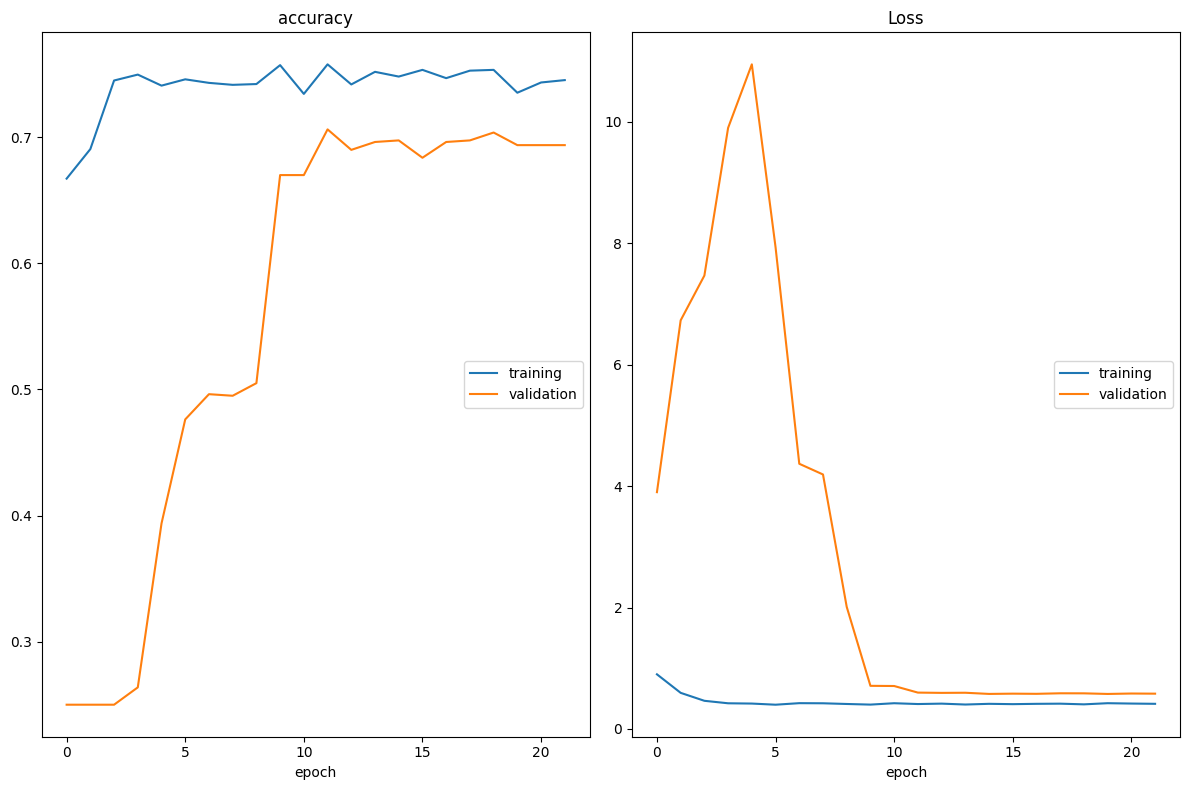

accuracy
	training         	 (min:    0.667, max:    0.758, cur:    0.745)
	validation       	 (min:    0.250, max:    0.706, cur:    0.694)
Loss
	training         	 (min:    0.399, max:    0.900, cur:    0.414)
	validation       	 (min:    0.576, max:   10.949, cur:    0.581)
100/100 [==============================] - 71s 714ms/step - loss: 0.4139 - accuracy: 0.7453 - val_loss: 0.5812 - val_accuracy: 0.6938


In [14]:
!pip install livelossplot
from keras.callbacks import EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback

earlystop=EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.01,mode='max')

callbacks=[earlystop,PlotLossesCallback()]

epochs =50
batch_size= 32

training = model.fit( datagen_train.flow(x_train,y_train,batch_size=batch_size,shuffle=True),
                   steps_per_epoch=len(x_train)//batch_size,epochs=epochs,
                   validation_data=datagen_valid.flow(x_valid,y_valid,batch_size=batch_size,shuffle=True),
                       validation_steps=len(x_valid)//batch_size,callbacks=callbacks)

##Model Evaluation


In [15]:
model.evaluate(x_valid,y_valid)

25/25 [==============================] - 4s 147ms/step - loss: 0.5829 - accuracy: 0.6963


[0.5829167366027832, 0.6962500214576721]

##Confusion Matrix

25/25 [==============================] - 3s 136ms/step
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       200
           1       0.47      0.59      0.53       200
           2       0.46      0.46      0.46       200
           3       1.00      1.00      1.00       200

    accuracy                           0.70       800
   macro avg       0.73      0.70      0.71       800
weighted avg       0.73      0.70      0.71       800

Classification Accuracy:  0.69625


[Text(0, 0.5, 'squiggle'),
 Text(0, 1.5, 'narrowband'),
 Text(0, 2.5, 'narrowbanddrd'),
 Text(0, 3.5, 'noise')]

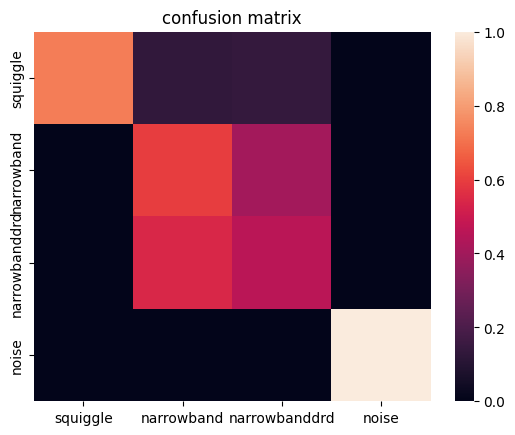

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true=np.argmax(y_valid,1)
y_predict=np.argmax(model.predict(x_valid),1)

print(metrics.classification_report(y_true,y_predict))
print ("Classification Accuracy: ", metrics.accuracy_score(y_true,y_predict))

labels=["squiggle","narrowband", "narrowbanddrd","noise"]

cm=plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true,y_predict, normalize='true'))
cm.set_title('confusion matrix')
cm.xaxis.set_ticklabels(labels)
cm.yaxis.set_ticklabels(labels)


